In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

# Data Preprocessing and Transformation

In [2]:
df = pd.read_csv('marketing_training.csv')

In [3]:
df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [4]:
#printing unique values
unique = []
for i in list(df.select_dtypes(include=["object_"]).columns):
    unique.append(list(df[i].unique()))

    

In [5]:
#creating dataframe of unqiue values of each categorical columns
unique_values = pd.DataFrame()
unique_values['columns'] = list(df.select_dtypes(include=["object_"]).columns)
unique_values['unique_values'] = unique

In [6]:
pd.set_option('expand_frame_repr', True)
pd.set_option('max_colwidth', 200)
unique_values

,columns,unique_values
0,profession,"[admin., blue-collar, technician, management, services, unemployed, housemaid, unknown, self-employed, retired, student, entrepreneur]"
1,marital,"[single, married, divorced, unknown]"
2,schooling,"[university.degree, nan, high.school, basic.4y, basic.9y, professional.course, basic.6y, unknown, illiterate]"
3,default,"[unknown, no, yes]"
4,housing,"[no, yes, unknown]"
5,loan,"[no, yes, unknown]"
6,contact,"[cellular, telephone]"
7,month,"[nov, jul, may, aug, apr, jun, mar, oct, sep, dec]"
8,day_of_week,"[mon, wed, tue, fri, thu, nan]"
9,poutcome,"[nonexistent, failure, success]"


There are columns with unknown and nonexistent as values. These values can also be treated as NaNs

In [7]:
df = df.replace('unknown', np.nan)
df = df.replace('nonexistent', np.nan)

In [8]:
df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,NaN,no,no,cellular,nov,mon,...,0,NaN,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,NaN,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,NaN,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,NaN,yes,yes,cellular,jul,wed,...,0,NaN,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [9]:
df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [10]:
df[['pdays','pmonths','previous','poutcome']]

,pdays,pmonths,previous,poutcome
0,999,999.0,0,NaN
1,999,999.0,0,NaN
2,999,999.0,0,NaN
3,999,999.0,0,NaN
4,999,999.0,1,failure
...,...,...,...,...
7409,999,999.0,0,NaN
7410,999,999.0,0,NaN
7411,999,999.0,1,failure
7412,999,999.0,0,NaN


It is clear the customers who were not contacted or failing to contact is filled with values 999 in pdays and pmonths.
To solve this we can create a boolean variable to show if the customer was previously contacted or not

In [11]:
# True and False are equivalent to 1 and 0 in numerical computations
df['previously_contacted'] = df.pdays!=999 

pdays and pmonths are identical in a way they represent the same and must highly correlated. So we need to remove pmonths from the datset

In [12]:
df[['previously_contacted','responded']]

,previously_contacted,responded
0,False,no
1,False,no
2,False,no
3,False,no
4,False,no
...,...,...
7409,False,no
7410,False,no
7411,False,no
7412,False,no


In [13]:
pd.crosstab(df.previously_contacted, df.responded, dropna=False)

responded,no,yes
previously_contacted,,
False,6471,652
True,103,188


good success ratio when they are previously contacted

In [14]:
df.pdays.unique()

array([999,   6,   7,   5,   1,   3,  10,  15,   2,  22,  14,   4,   9,
        11,  12,  13,   8,  16,   0,  17,  21])

The values in pdays can skew the data and this can be considered outlier as it is too far from the other values. We can substitute 999
with -1

In [15]:
df.loc[df.pdays==999, 'pdays'] = -1

## Variable transformation

The categorical variables can transformed using one hot encoding. One hot encoding is way to transform the categorical data into binary variables with its unique values becoming columns and filled with 0,1 for non-existent and existent 

In [16]:
df_tranformed = pd.get_dummies(df, dummy_na=True, drop_first=True)

In [17]:
df_tranformed

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_nan,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,day_of_week_nan,poutcome_success,poutcome_nan,responded_yes,responded_nan
0,55.0,1,-1,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,...,0,1,0,0,0,0,0,1,0,0
1,NaN,1,-1,0,1.4,93.918,-42.7,4.960,5228.1,999.0,...,0,1,0,0,0,0,0,1,0,0
2,42.0,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,999.0,...,0,1,0,0,0,0,0,1,0,0
3,55.0,2,-1,0,1.4,93.918,-42.7,4.962,5228.1,999.0,...,0,0,0,0,1,0,0,1,0,0
4,NaN,5,-1,1,-1.8,92.893,-46.2,1.291,5099.1,999.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.0,3,-1,0,1.1,93.994,-36.4,4.859,5191.0,999.0,...,0,0,0,0,1,0,0,1,0,0
7410,45.0,3,-1,0,1.4,93.918,-42.7,4.961,5228.1,999.0,...,0,0,0,1,0,0,0,1,0,0
7411,27.0,2,-1,1,-1.8,92.893,-46.2,1.250,5099.1,999.0,...,0,0,0,0,0,0,0,0,0,0
7412,51.0,2,-1,0,-0.1,93.200,-42.0,4.076,5195.8,999.0,...,0,0,1,0,0,0,0,1,0,0


In [18]:
#removing all the columns having NA values
df_tranformed = df_tranformed.loc[:, (df_tranformed != 0).any(axis=0)] 

In [20]:
df_tranformed.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,day_of_week_nan,poutcome_success,poutcome_nan,responded_yes
0,55.0,1,-1,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,...,0,0,1,0,0,0,0,0,1,0
1,NaN,1,-1,0,1.4,93.918,-42.7,4.960,5228.1,999.0,...,0,0,1,0,0,0,0,0,1,0
2,42.0,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,999.0,...,0,0,1,0,0,0,0,0,1,0
3,55.0,2,-1,0,1.4,93.918,-42.7,4.962,5228.1,999.0,...,0,0,0,0,0,1,0,0,1,0
4,NaN,5,-1,1,-1.8,92.893,-46.2,1.291,5099.1,999.0,...,0,0,0,0,1,0,0,0,0,0


## Imputing missing values

In [21]:
#filling with mean
df_tranformed['impute_age'] = df_tranformed['custAge'].isnull()
imputed_age = df_tranformed.mean().custAge
df_tranformed['custAge'] = df_tranformed['custAge'].fillna(imputed_age)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
df_tranformed =df_tranformed.drop('impute_age',axis= 1)

## Feature Standardization of continous variables

In [23]:
from sklearn.preprocessing import MinMaxScaler
X = df_tranformed.drop('responded_yes', axis=1).values.astype(float)
y = df_tranformed.responded_yes.values.astype(float)

X_scaler = MinMaxScaler(feature_range=(0,1))
X = X_scaler.fit_transform(X)

In [24]:


list(df_tranformed.columns)[:-1]

['custAge',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail',
 'previously_contacted',
 'profession_blue-collar',
 'profession_entrepreneur',
 'profession_housemaid',
 'profession_management',
 'profession_retired',
 'profession_self-employed',
 'profession_services',
 'profession_student',
 'profession_technician',
 'profession_unemployed',
 'profession_nan',
 'marital_married',
 'marital_single',
 'marital_nan',
 'schooling_basic.6y',
 'schooling_basic.9y',
 'schooling_high.school',
 'schooling_illiterate',
 'schooling_professional.course',
 'schooling_university.degree',
 'schooling_nan',
 'default_yes',
 'default_nan',
 'housing_yes',
 'housing_nan',
 'loan_yes',
 'loan_nan',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_o

## Dealing Imbalaced Data

In [25]:
df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,previously_contacted
0,55.0,admin.,single,university.degree,NaN,no,no,cellular,nov,mon,...,NaN,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no,False
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,NaN,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no,False
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,NaN,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no,False
3,55.0,management,divorced,NaN,NaN,yes,yes,cellular,jul,wed,...,NaN,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no,False
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no,False


In [26]:
df_tranformed

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,day_of_week_nan,poutcome_success,poutcome_nan,responded_yes
0,55.000000,1,-1,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,...,0,0,1,0,0,0,0,0,1,0
1,40.009804,1,-1,0,1.4,93.918,-42.7,4.960,5228.1,999.0,...,0,0,1,0,0,0,0,0,1,0
2,42.000000,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,999.0,...,0,0,1,0,0,0,0,0,1,0
3,55.000000,2,-1,0,1.4,93.918,-42.7,4.962,5228.1,999.0,...,0,0,0,0,0,1,0,0,1,0
4,40.009804,5,-1,1,-1.8,92.893,-46.2,1.291,5099.1,999.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,3,-1,0,1.1,93.994,-36.4,4.859,5191.0,999.0,...,0,0,0,0,0,1,0,0,1,0
7410,45.000000,3,-1,0,1.4,93.918,-42.7,4.961,5228.1,999.0,...,0,0,0,0,1,0,0,0,1,0
7411,27.000000,2,-1,1,-1.8,92.893,-46.2,1.250,5099.1,999.0,...,0,0,0,0,0,0,0,0,0,0
7412,51.000000,2,-1,0,-0.1,93.200,-42.0,4.076,5195.8,999.0,...,0,0,0,1,0,0,0,0,1,0


Class 0: 6574
Class 1: 840
Proportion: 7.83 : 1


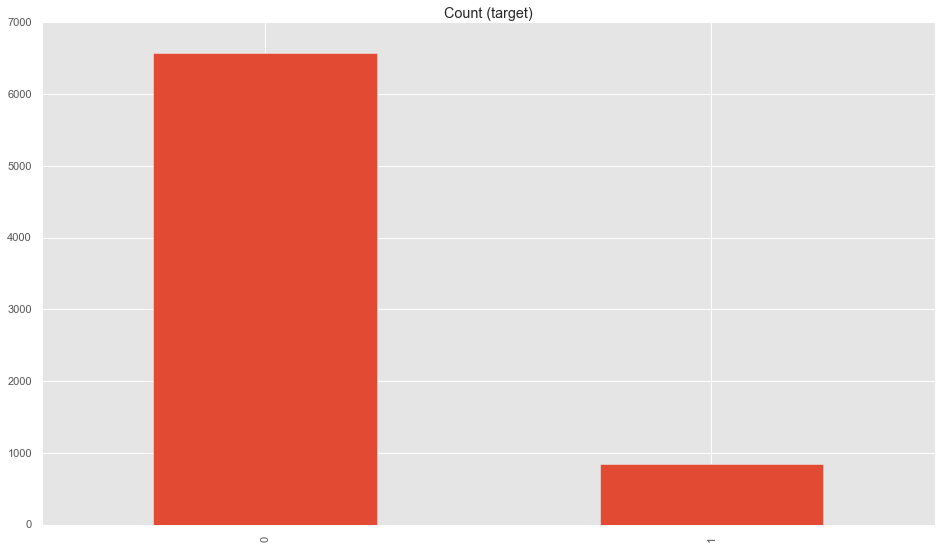

In [28]:
target_count = df_tranformed.responded_yes.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

# Resampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

### Under-sampling: Tomek links

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Using TensorFlow backend.


Removed indexes: [   0    1    2 ... 7411 7412 7413]


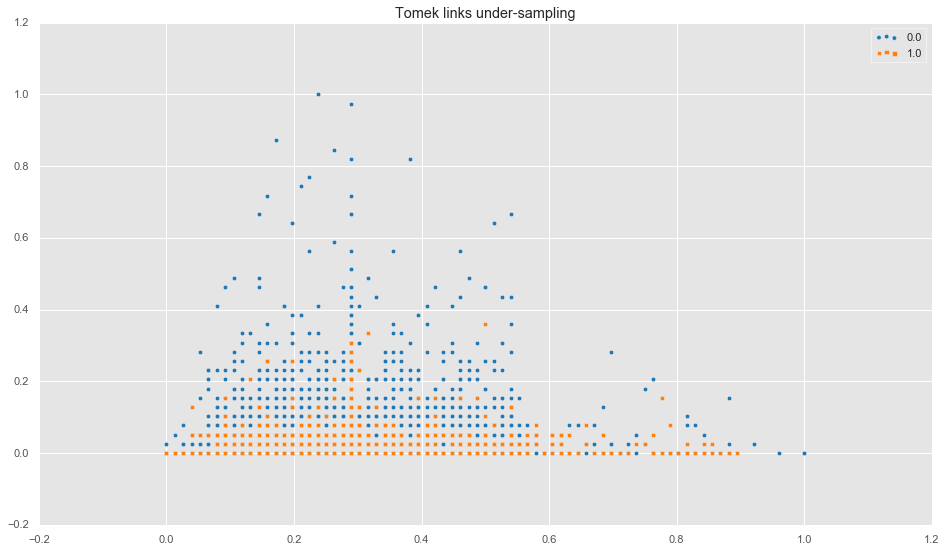

In [29]:
from imblearn.under_sampling import TomekLinks
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

### Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

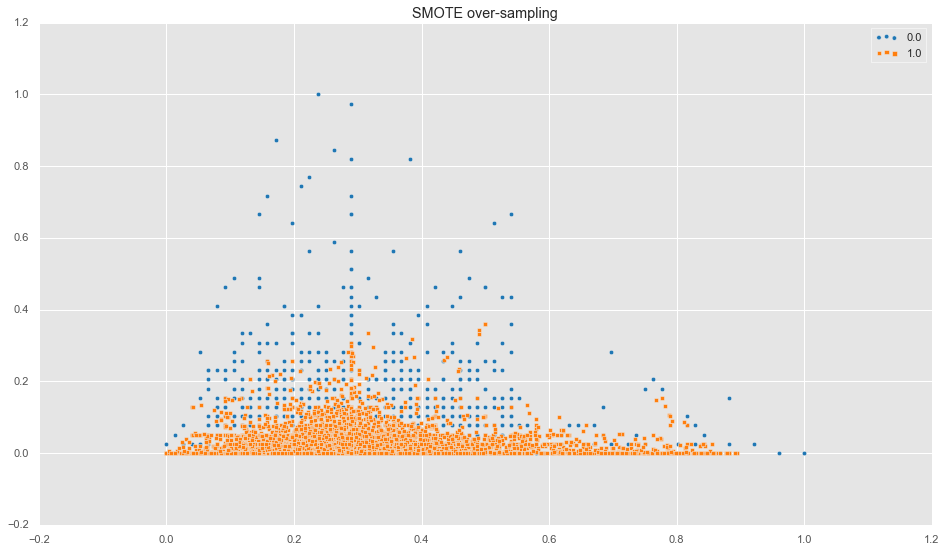

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

### Over-sampling followed by under-sampling

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

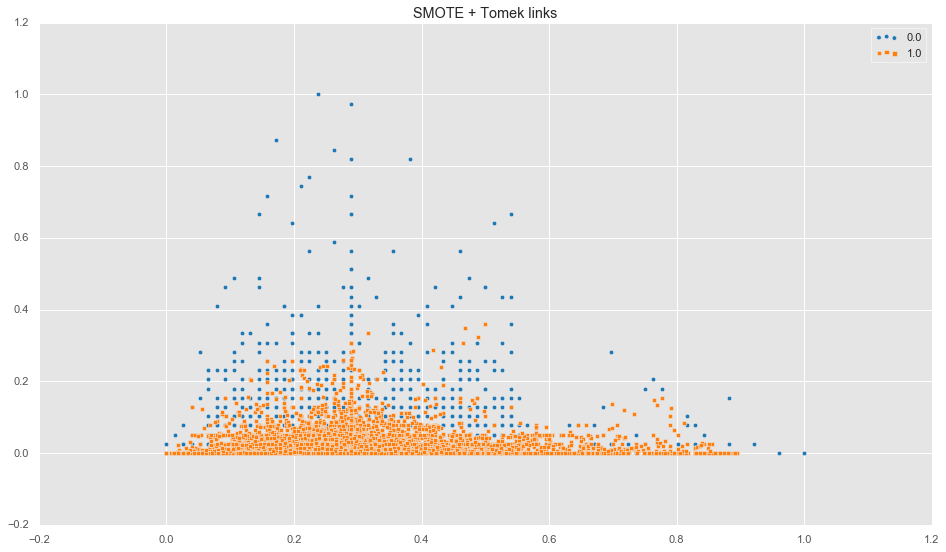

In [31]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

# Now we have created 3 datasets
1.  Tomek Links 
2. SMOTE
3. SMOTE + Tomek

# Modelling

# Model training and ROC validation

I created a function `roc_analysis` that fits a classifer to a subset of the data and then cross-validates it on the remainder of the data. This fit-and-validate cycle is repeated k times (k-fold cross validation). 

The function also produces ROC curves to quantify model performance. In the presence of skewed classes, ROC curves better characterize algorithm performance than classification accuracy/error.

In [0]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def parse_function_name(s):
    end = s.find( '(' )
    if end != -1:
        return s[:end]
    return 'error parsing function name'

def roc_analysis(classifier, X,y, number_splits=5): 
    
   
    cross_validator = StratifiedKFold(n_splits=number_splits, 
                                      shuffle=True)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i, (train, test) in enumerate(cross_validator.split(X, y)):
        probabilities = classifier.fit(X[train], y[train]).predict_proba(X[test])
        fpr, tpr, thresholds = roc_curve(y[test], probabilities[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='classifier that ignores features', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % 
             (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, 
                     color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(parse_function_name(classifier.__str__()))
    plt.legend(loc="lower right")
    plt.show()

#Logistic Regresion with normal data

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

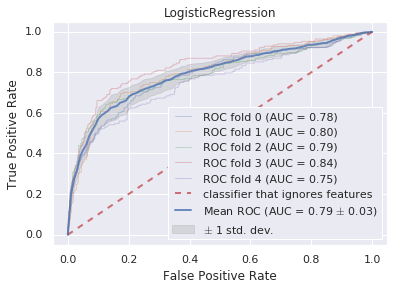

In [36]:
from sklearn.linear_model import LogisticRegression
roc_analysis(LogisticRegression(), X,y)

Mean area under the ROC curve (AUC) is 0.79. That's pretty good performance: it's about half-way between a classifier that ignores features (AUC = 0.5) and a perfect classifier (AUC = 1). 
 

Model can be affected with high bias to check this we increase the model complexity by using MLP classifier

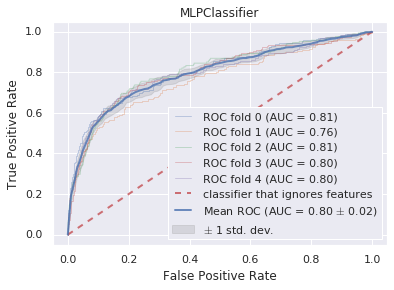

In [37]:
from sklearn.neural_network import MLPClassifier
roc_analysis(MLPClassifier(hidden_layer_sizes=(100), alpha=1), X,y) 

Mean AUC is 0.80 which is very close to Logistic model so the model is not having high bias
 

# Logistic Regression with Tomek resampled data

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

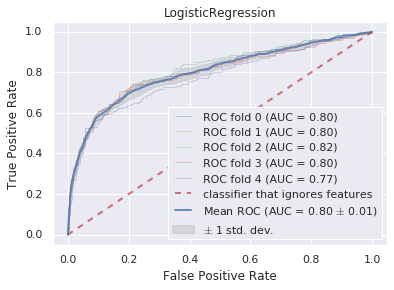

In [38]:
roc_analysis(LogisticRegression(), X_tl, y_tl) 


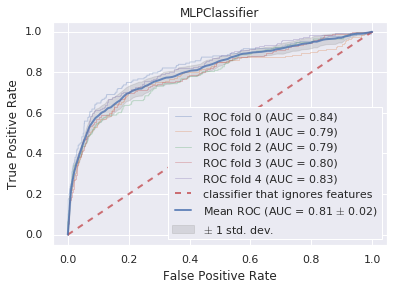

In [39]:
#MLP with Tomek resampled data
roc_analysis(MLPClassifier(hidden_layer_sizes=(100), alpha=1), X_tl, y_tl) 

In [0]:
#Logistic Regression with SMOTE resampled data

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

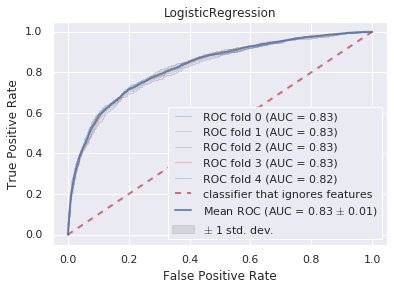

In [41]:
roc_analysis(LogisticRegression(), X_sm, y_sm) 


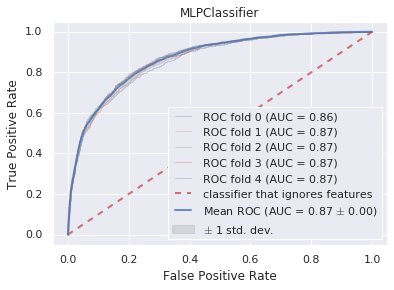

In [42]:
#MLP with SMOTE resampled data
roc_analysis(MLPClassifier(hidden_layer_sizes=(100), alpha=1), X_sm, y_sm) 

#Logistic Regression with SMOTE + Tomek data

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

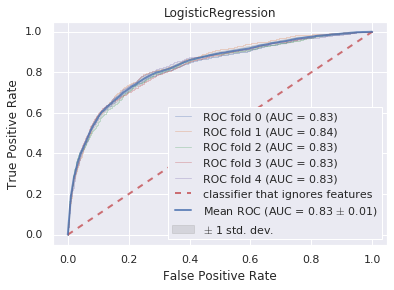

In [43]:
roc_analysis(LogisticRegression(), X_smt, y_smt) 


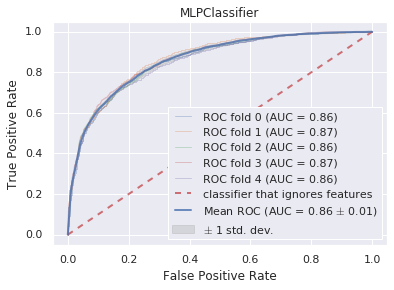

In [45]:
#MLP with SMOTE+Tomek resampled data
roc_analysis(MLPClassifier(hidden_layer_sizes=(100), alpha=1), X_smt, y_smt)

In [0]:
# SVM

# SVM

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

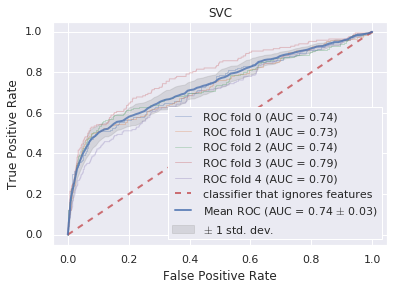

In [48]:
from sklearn.svm import SVC
roc_analysis(SVC(probability=True), X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

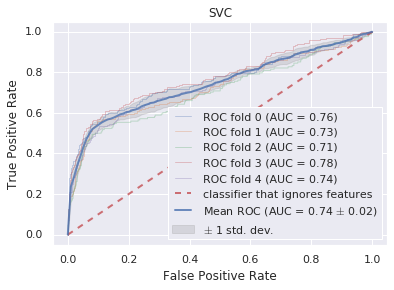

In [49]:
roc_analysis(SVC(probability=True), X_tl,y_tl)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

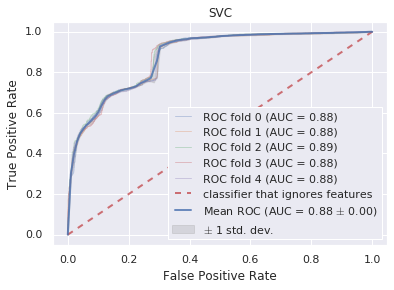

In [50]:
roc_analysis(SVC(probability=True), X_sm,y_sm)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

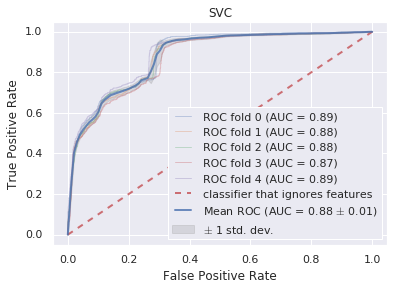

In [51]:
roc_analysis(SVC(probability=True), X_smt,y_smt)

# Decision Tree

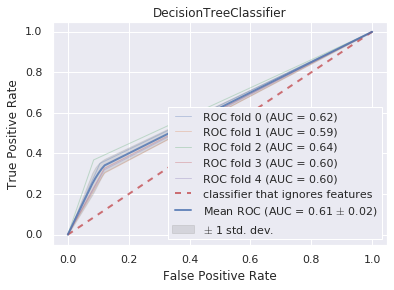

In [52]:
from sklearn.tree import DecisionTreeClassifier
roc_analysis(DecisionTreeClassifier(), X,y)


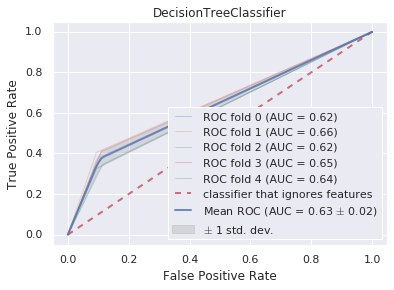

In [53]:
roc_analysis(DecisionTreeClassifier(), X_tl,y_tl)

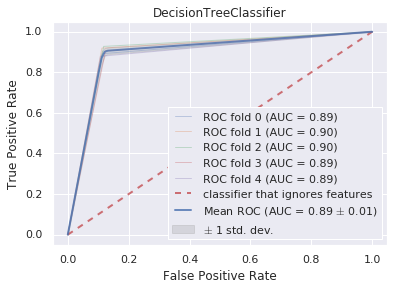

In [54]:
roc_analysis(DecisionTreeClassifier(), X_sm,y_sm)

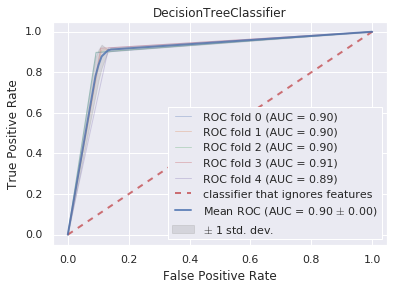

In [0]:
roc_analysis(DecisionTreeClassifier(), X_smt,y_smt)

# Random Forest

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


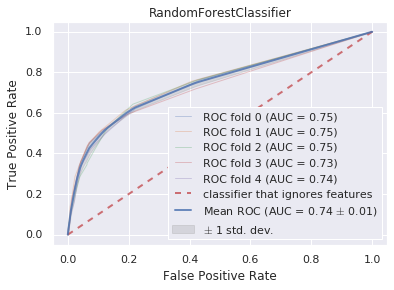

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


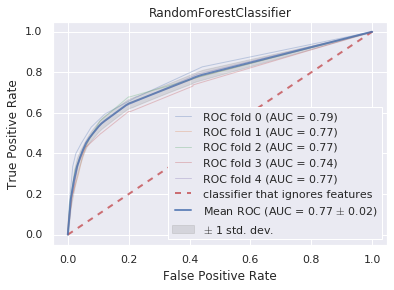

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


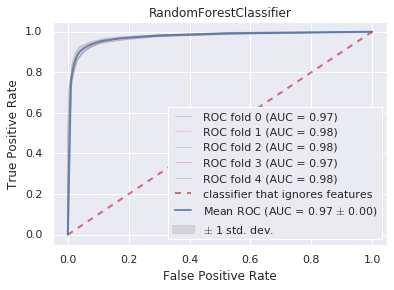

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


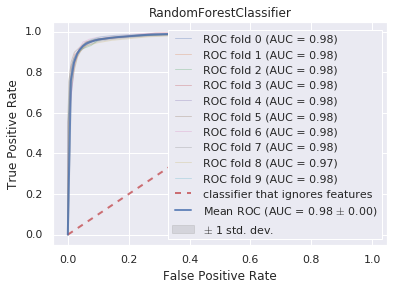

In [56]:
from sklearn.ensemble import RandomForestClassifier
roc_analysis(RandomForestClassifier(), X,y)
roc_analysis(RandomForestClassifier(), X_tl,y_tl)
roc_analysis(RandomForestClassifier(), X_sm,y_sm)
roc_analysis(RandomForestClassifier(), X_smt,y_smt,10)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


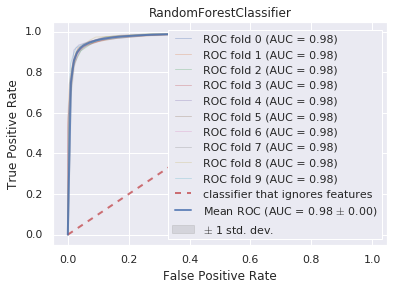

In [57]:
roc_analysis(RandomForestClassifier(), X_smt,y_smt,10)

In [0]:
#combining X_smt and y_smt into a dataframe to feed into calibration curve
data = pd.DataFrame(X_smt,columns=list(df_tranformed.columns)[:-1])


In [0]:
data['responded']= y_smt

In [0]:
#Use 5-fold cross-validation instead, and take the average of all of my data to make the calibration plot.
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1234)

# store probability predictions and true labels here
decision_kfold_probability = []
svm_kfold_probaility = []
rf_kfold_probability = []

kfold_true_label = []


In [73]:
#Train and predict on each split.
for train_index, validate_index in kf.split(data):
    #gives a list a index to split into train and validation
    kfold_train, kfold_validate = data.iloc[train_index], data.iloc[validate_index]
    #gives kfold_train and kfold_validate data
    feature_cols = list(df_tranformed.columns)[:-1]
    #getting input features except the last one which is responded

    train_features = kfold_train[feature_cols]
    train_labels = kfold_train['responded']
    validate_features = kfold_validate[feature_cols]
    validate_labels = kfold_validate['responded']
    #fitting DT  and RF
    #SVM_model = SVC().fit(X=train_features ,y=train_labels)
    decision_model = DecisionTreeClassifier().fit(X=train_features ,y=train_labels)
    rf_model = RandomForestClassifier().fit(X=train_features, y=train_labels)
    #getting predicted probabilties
    decision_kfold_probability.append(decision_model.predict_proba(validate_features)[:,1])
    #svm_kfold_probaility.append(SVM_model.predict_proba(validate_features)[:,1])
    rf_kfold_probability.append(rf_model.predict_proba(validate_features)[:,1])
    #storing the true label
    kfold_true_label.append(validate_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

In [0]:
#Concatenate the results and compute bins for calibration curves.
decision_kfold_probability_stacked = np.hstack(decision_kfold_probability)
rf_kfold_probability_stacked = np.hstack(rf_kfold_probability)
kfold_true_label_stacked = np.hstack(kfold_true_label)
#Now we have class probabilities and labels, we can compute the bins for calibration plot
from sklearn.calibration import calibration_curve   

#sklearn.calibration.calibration_curve returns the x,y coordinates for my logistic regression model predictions on the calibration plot.                               
dec_y, dec_x = calibration_curve(kfold_true_label_stacked, decision_kfold_probability_stacked, n_bins=10)
rf_y, rf_x = calibration_curve(kfold_true_label_stacked, rf_kfold_probability_stacked, n_bins=10)

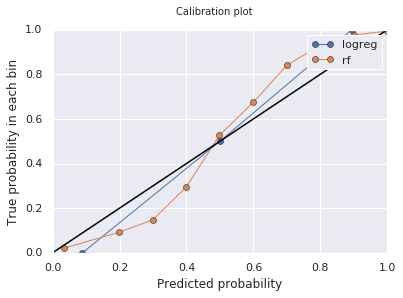

In [76]:
#Plot calibration curves
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# calibration curves
fig, ax = plt.subplots()
plt.plot(dec_y, dec_x , marker='o', linewidth=1, label='logreg')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

#Preparing test data

In [0]:
def sanitize(data_frame):
    data_frame = data_frame.replace('unknown', np.nan)
    data_frame = data_frame.replace('nonexistent', np.nan)
    data_frame = data_frame.drop('pmonths',axis=1)
    data_frame['previously_contacted'] = data_frame.pdays!=999 
    data_frame.loc[data_frame.pdays==999, 'pdays'] = -1
    data_frame = track_missing_ages(data_frame)
    data_frame = impute_age(data_frame)
    return data_frame

In [0]:
def get_values(data_frame): 
    return data_frame.values.astype(float)

def track_missing_ages(data_frame): 
    data_frame['impute_age'] = data_frame['custAge'].isnull()
    return data_frame

def impute_age(data_frame): 
    imputed_age = data_frame.mean().custAge
    data_frame['custAge'] = data_frame['custAge'].fillna(imputed_age)
    return data_frame

def one_hot_encode(data_frame): 
    data_frame = pd.get_dummies(data_frame, dummy_na=True, drop_first=True)
    
    return data_frame.loc[:, (data_frame != 0).any(axis=0)] 
def encode_train_test(): 
    df_train = sanitize(pd.read_csv('marketing_training.csv'))
    df_train_X = df_train.drop('responded', axis=1)
    df_train_y = one_hot_encode(pd.DataFrame(df_train['responded']))

    df_test_X = sanitize(pd.read_csv('marketing_test.csv')).drop('Unnamed: 0', axis=1)

    df_X = pd.concat([df_train_X, df_test_X])
    df_X = one_hot_encode(df_X)
    split = len(df_train_X)
    df_train_X = df_X[:split]
    df_test_X = df_X[split:]
        
    return (get_values(df_train_X), 
            get_values(df_train_y), 
            get_values(df_test_X))

In [0]:
def compute_normalized_X_y(): 
    X_train, y_train, X_test = encode_train_test() 
    X_scaler = MinMaxScaler(feature_range=(0,1))
    X_train = X_scaler.fit_transform(X_train)
    X_smt, y_smt = smt.fit_sample(X_train, y_train)
    X_test = X_scaler.transform(X_test)
    return X_smt, y_smt, X_test

def convert_to_yes_or_no(x): 
    if int(x) == 0: 
        return 'no'
    else: 
        return 'yes'

def predict_with_final_model():
    X_train, y_train, X_test = compute_normalized_X_y()
    final_model = RandomForestClassifier()
    final_model1 =  DecisionTreeClassifier()
    predictions_ran = final_model.fit(X_smt, y_smt.ravel()).predict(X_test)
    predictions_ran = list(map(convert_to_yes_or_no, predictions_ran))
    predictions_dec = final_model1.fit(X_smt, y_smt.ravel()).predict(X_test)
    predictions_dec = list(map(convert_to_yes_or_no, predictions_dec))
    df_test = pd.read_csv('marketing_test.csv')
    df_test['predict_RF'] = predictions_ran
    df_test['predict_DT'] = predictions_dec
    df_test = df_test[['predict_RF','predict_DT']]
    df_test.to_csv('marketing_test_with_predictions.csv')
    


In [85]:
predict_with_final_model()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
